In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pymp
import time
import multiprocessing as mp
from numba import jit, njit 

In [2]:
n_populacao = 100000000
tamanhos_amostras = [1000,10000,100000]
#colors = ['blue','orange','green']
n_candidato_a = int(n_populacao*0.4) # Votos
n_candidato_b = int(n_populacao*0.31) # Votos
n_candidato_c = int(n_populacao*0.29) # Votos
votos_a = np.repeat('a',n_candidato_a) #Representação dos votos
votos_b = np.repeat('b',n_candidato_b) #de cada
votos_c = np.repeat('c',n_candidato_c) #candidato
votos_populacao = np.append(votos_a,np.append(votos_b,votos_c))
for j in range(3):
    np.random.shuffle(votos_populacao) #aleatorizar os votos

In [3]:
def hdr_simple(array,p):
    return np.array([np.quantile(array,(1-p)/2),np.quantile(array,1-(1-p)/2)])

In [4]:
amostras_p_bootstrap = [votos_populacao[np.random.randint(votos_populacao.size, size=i)] for i in tamanhos_amostras]
n_resamples = 100 #Cada uma das amostras, faremos n_resamples reamostragens

In [5]:
bootstrap_dists = [[np.random.choice(amostras_p_bootstrap[s], size=amostras_p_bootstrap[s].size, replace=True)
                    for i in range(n_resamples)] 
                   for s in range(3)] 

In [8]:
#distribuição bootstrap -- > pega amostra de 1.000 pessoas e sorteio (c reposição) 10.000 vezes e crio 10k novas amostras
# Verificar a porcentagem de cada candidato
bsporc_a = np.array([np.array([(bootstrap_dists[s][i][bootstrap_dists[s][i]=='a'].size/tamanhos_amostras[s])*100
                      for i in range(n_resamples)]) 
            for s in range(3)])
bsporc_b = np.array([np.array([(bootstrap_dists[s][i][bootstrap_dists[s][i]=='b'].size/tamanhos_amostras[s])*100
                      for i in range(n_resamples)]) 
            for s in range(3)])
bsporc_c = np.array([np.array([(bootstrap_dists[s][i][bootstrap_dists[s][i]=='c'].size/tamanhos_amostras[s])*100
                      for i in range(n_resamples)]) 
            for s in range(3)])
#Proporção --> contando quantas pessoas votaram no tal candidato em cada nova-amostragem que criamos acima

candidatos = np.array([bsporc_a, bsporc_b, bsporc_c])
errorbs = np.array([[hdr_simple(bs[s], 0.95) for s in range(3)] for bs in candidatos])

In [11]:
#Obter amostras e resultados diretamente da população original.
amostras_pop = [[np.random.choice(votos_populacao, size=s, replace=True)
                 for i in range(n_resamples)]
                for s in tamanhos_amostras]

porc_a = np.array([np.array([(amostras_pop[s][i][amostras_pop[s][i]=='a'].size/tamanhos_amostras[s])*100
                    for i in range(n_resamples)]) 
          for s in range(3)])
porc_b = np.array([np.array([(amostras_pop[s][i][amostras_pop[s][i]=='b'].size/tamanhos_amostras[s])*100
                    for i in range(n_resamples)]) 
          for s in range(3)])
porc_c = np.array([np.array([(amostras_pop[s][i][amostras_pop[s][i]=='c'].size/tamanhos_amostras[s])*100
                    for i in range(n_resamples)]) 
          for s in range(3)])
popabc = np.array([porc_a, porc_b, porc_c])
errorpop = np.array([[hdr_simple(pop[s], 0.95) for s in range(3)] for pop in popabc])

IndexError: string index out of range

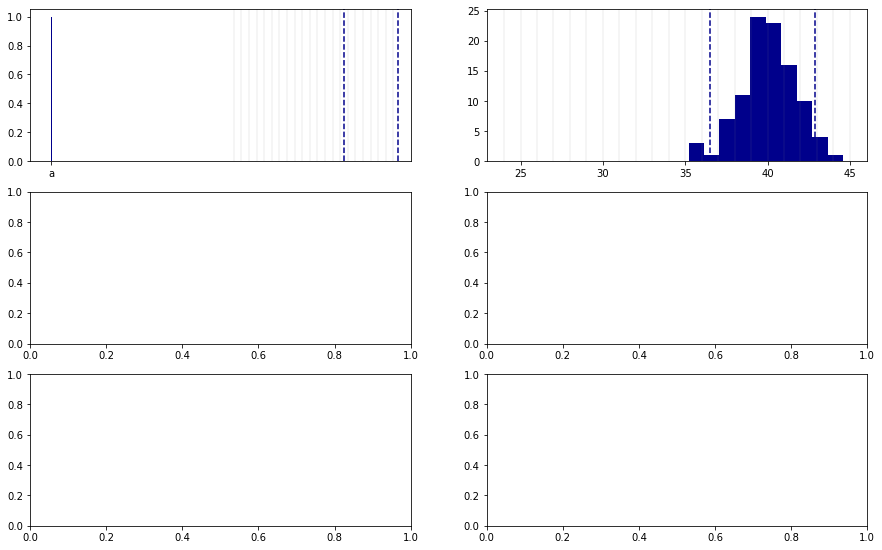

In [13]:
##Plotar gráficos
cores = [['darkblue', 'mediumblue', 'blue'],
         ['darkslategrey', 'darkcyan', 'cyan'],
         ['maroon', 'firebrick', 'brown']]
popporc = [40, 31, 29]
candidatos = 'a b c'.split()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9.5))
for i, ax in enumerate(axes):
    for x in range(24, 46):
        ax[1].axvline(x=x, color='grey',alpha=0.1)
        ax[0].axvline(x=x, color='grey',alpha=0.1)
    for s in range(3):
        ax[0].hist(candidatos[i][s], color=cores[i][s])
        ax[0].axvline(x=errorbs[i][s][0], color=cores[i][s], ls='--')
        ax[0].axvline(x=errorbs[i][s][1], color=cores[i][s], ls='--')
        ax[1].hist(popabc[i][s], color=cores[i][s])
        ax[1].axvline(x=errorpop[i][s][0], color=cores[i][s], ls='--')
        ax[1].axvline(x=errorpop[i][s][1], color=cores[i][s], ls='--')
    ax[0].axvline(x=popporc[i], color='k')
    ax[1].axvline(x=popporc[i], color='k')
    ax[0].set_title(f'Candidato {candidatos[i]} - bootstrap')
    ax[1].set_title(f'Candidato {candidatos[i]} - população')
plt.tight_layout()
plt.show()